In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/AI Project/spectrograms')

In [ ]:
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### Load Images



In [ ]:
classes = os.listdir('.')

In [ ]:
for class_ in classes:
  print(f"Class {class_} has {len(os.listdir(class_))} samples")

Class 6 has 374 samples
Class 5 has 1000 samples
Class 2 has 1000 samples
Class 1 has 429 samples
Class 3 has 1000 samples
Class 8 has 929 samples
Class 9 has 1000 samples
Class 0 has 1000 samples
Class 4 has 1000 samples
Class 7 has 1000 samples


**6 ve 1 diger siniflara gore daha az veriye sahip**

**Bu siniflarda spektogramlari %50 kaydirarak veri artirimi uygulayacagiz**

**Asagida bir ornegi var**

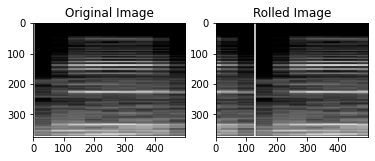

In [ ]:
sample_class = classes[3]
sample_filename = os.listdir(sample_class)[10]
sample_image = cv2.imread(f'{sample_class}/{sample_filename}', cv2.IMREAD_GRAYSCALE)

rolled_image = np.roll(sample_image, 125, axis = 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(sample_image, cmap = 'gray')
ax1.set_title('Original Image')
ax2.imshow(rolled_image, cmap = 'gray')
ax2.set_title('Rolled Image')
fig.show()

**Resimlerin sag ve alt kenarlarinda beyaz cizgiler var**

**Check white lines**

In [ ]:
sample_image.shape

(374, 500)

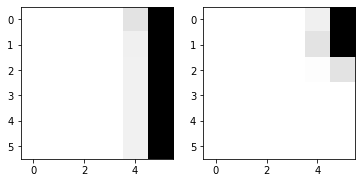

In [ ]:
sample_class = classes[0]
sample_filename = os.listdir(sample_class)[15]
sample_image = cv2.imread(f'{sample_class}/{sample_filename}', cv2.IMREAD_GRAYSCALE)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(sample_image[0:6,0:6], cmap = 'gray')
ax2.imshow(sample_image[-6:,0:6], cmap = 'gray')

# x axis'inde ilk 6 pixeli ve y axis'inde son 4 pixeli silmemiz gerek

**Tekrar deneyelim**

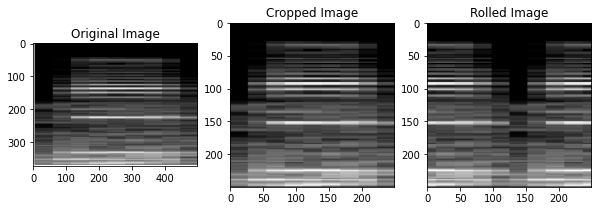

In [ ]:
sample_class = classes[3]
sample_filename = os.listdir(sample_class)[10]
original_image = cv2.imread(f'{sample_class}/{sample_filename}', cv2.IMREAD_GRAYSCALE)
sample_image = original_image[:-4,6:]
sample_image = cv2.resize(sample_image, (250,250))

rolled_image = np.roll(sample_image, 125, axis = 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,15))
ax1.imshow(original_image, cmap = 'gray')
ax1.set_title('Original Image')
ax2.imshow(sample_image, cmap = 'gray')
ax2.set_title('Cropped Image')
ax3.imshow(rolled_image, cmap = 'gray')
ax3.set_title('Rolled Image')
fig.show()

### Process Images

In [ ]:
def preprocess_image(class_idx,image_filename, roll = False):
  """
    preprocess_image reads (in grayscale), resizes,
    and normalizes images 

    :param class_idx: int value of class
    :param image_filename: string, image filename
    :return: numpy array of preprocessed image
  """ 

  image = cv2.imread(f'{class_idx}/{image_filename}', cv2.IMREAD_GRAYSCALE)
  image = image[:-4,6:]
  image = cv2.resize(image, (250,250))
  image = image / 255. 

  if roll:
    return np.roll(image, 125, axis = 1)

  return image

In [ ]:
labels = []
images = []
for class_idx in classes:
  image_filenames = os.listdir(str(class_idx))
  for filename in tqdm(image_filenames):
    labels.append(class_idx)
    images.append(preprocess_image(class_idx, filename))

    if class_idx in ['6', '1']:
      labels.append(class_idx)
      images.append(preprocess_image(class_idx, filename, roll = True))

100%|██████████| 1000/1000 [00:08<00:00, 113.64it/s]


In [ ]:
images = np.asarray(images, dtype = np.float32)
labels = np.asarray(labels).reshape(-1,1)

**Sample image**


Class: ['6']


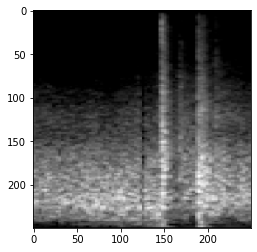

In [ ]:
idx = 41
print(f'Class: {labels[idx]}')
plt.imshow(images[idx], cmap = 'gray')

In [ ]:
for class_ in classes:
  print(f"Class {class_} has {len(labels[labels == class_])} samples")

Class 6 has 748 samples
Class 5 has 1000 samples
Class 2 has 1000 samples
Class 1 has 858 samples
Class 3 has 1000 samples
Class 8 has 929 samples
Class 9 has 1000 samples
Class 0 has 1000 samples
Class 4 has 1000 samples
Class 7 has 1000 samples


### Encode Class Labels

In [ ]:
ohe = OneHotEncoder()
encoded_labels = ohe.fit_transform(labels).toarray()

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size = 0.2, shuffle = True)

In [ ]:
os.chdir("/content/drive/MyDrive/AI Project")

In [ ]:
np.save('x_train', x_train)
np.save('x_test', x_test)
np.save('y_train', y_train)
np.save('y_test', y_test)